## Diabetes prediction using KNN

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [25]:
df=pd.read_csv('../Data Set/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.shape

(768, 9)

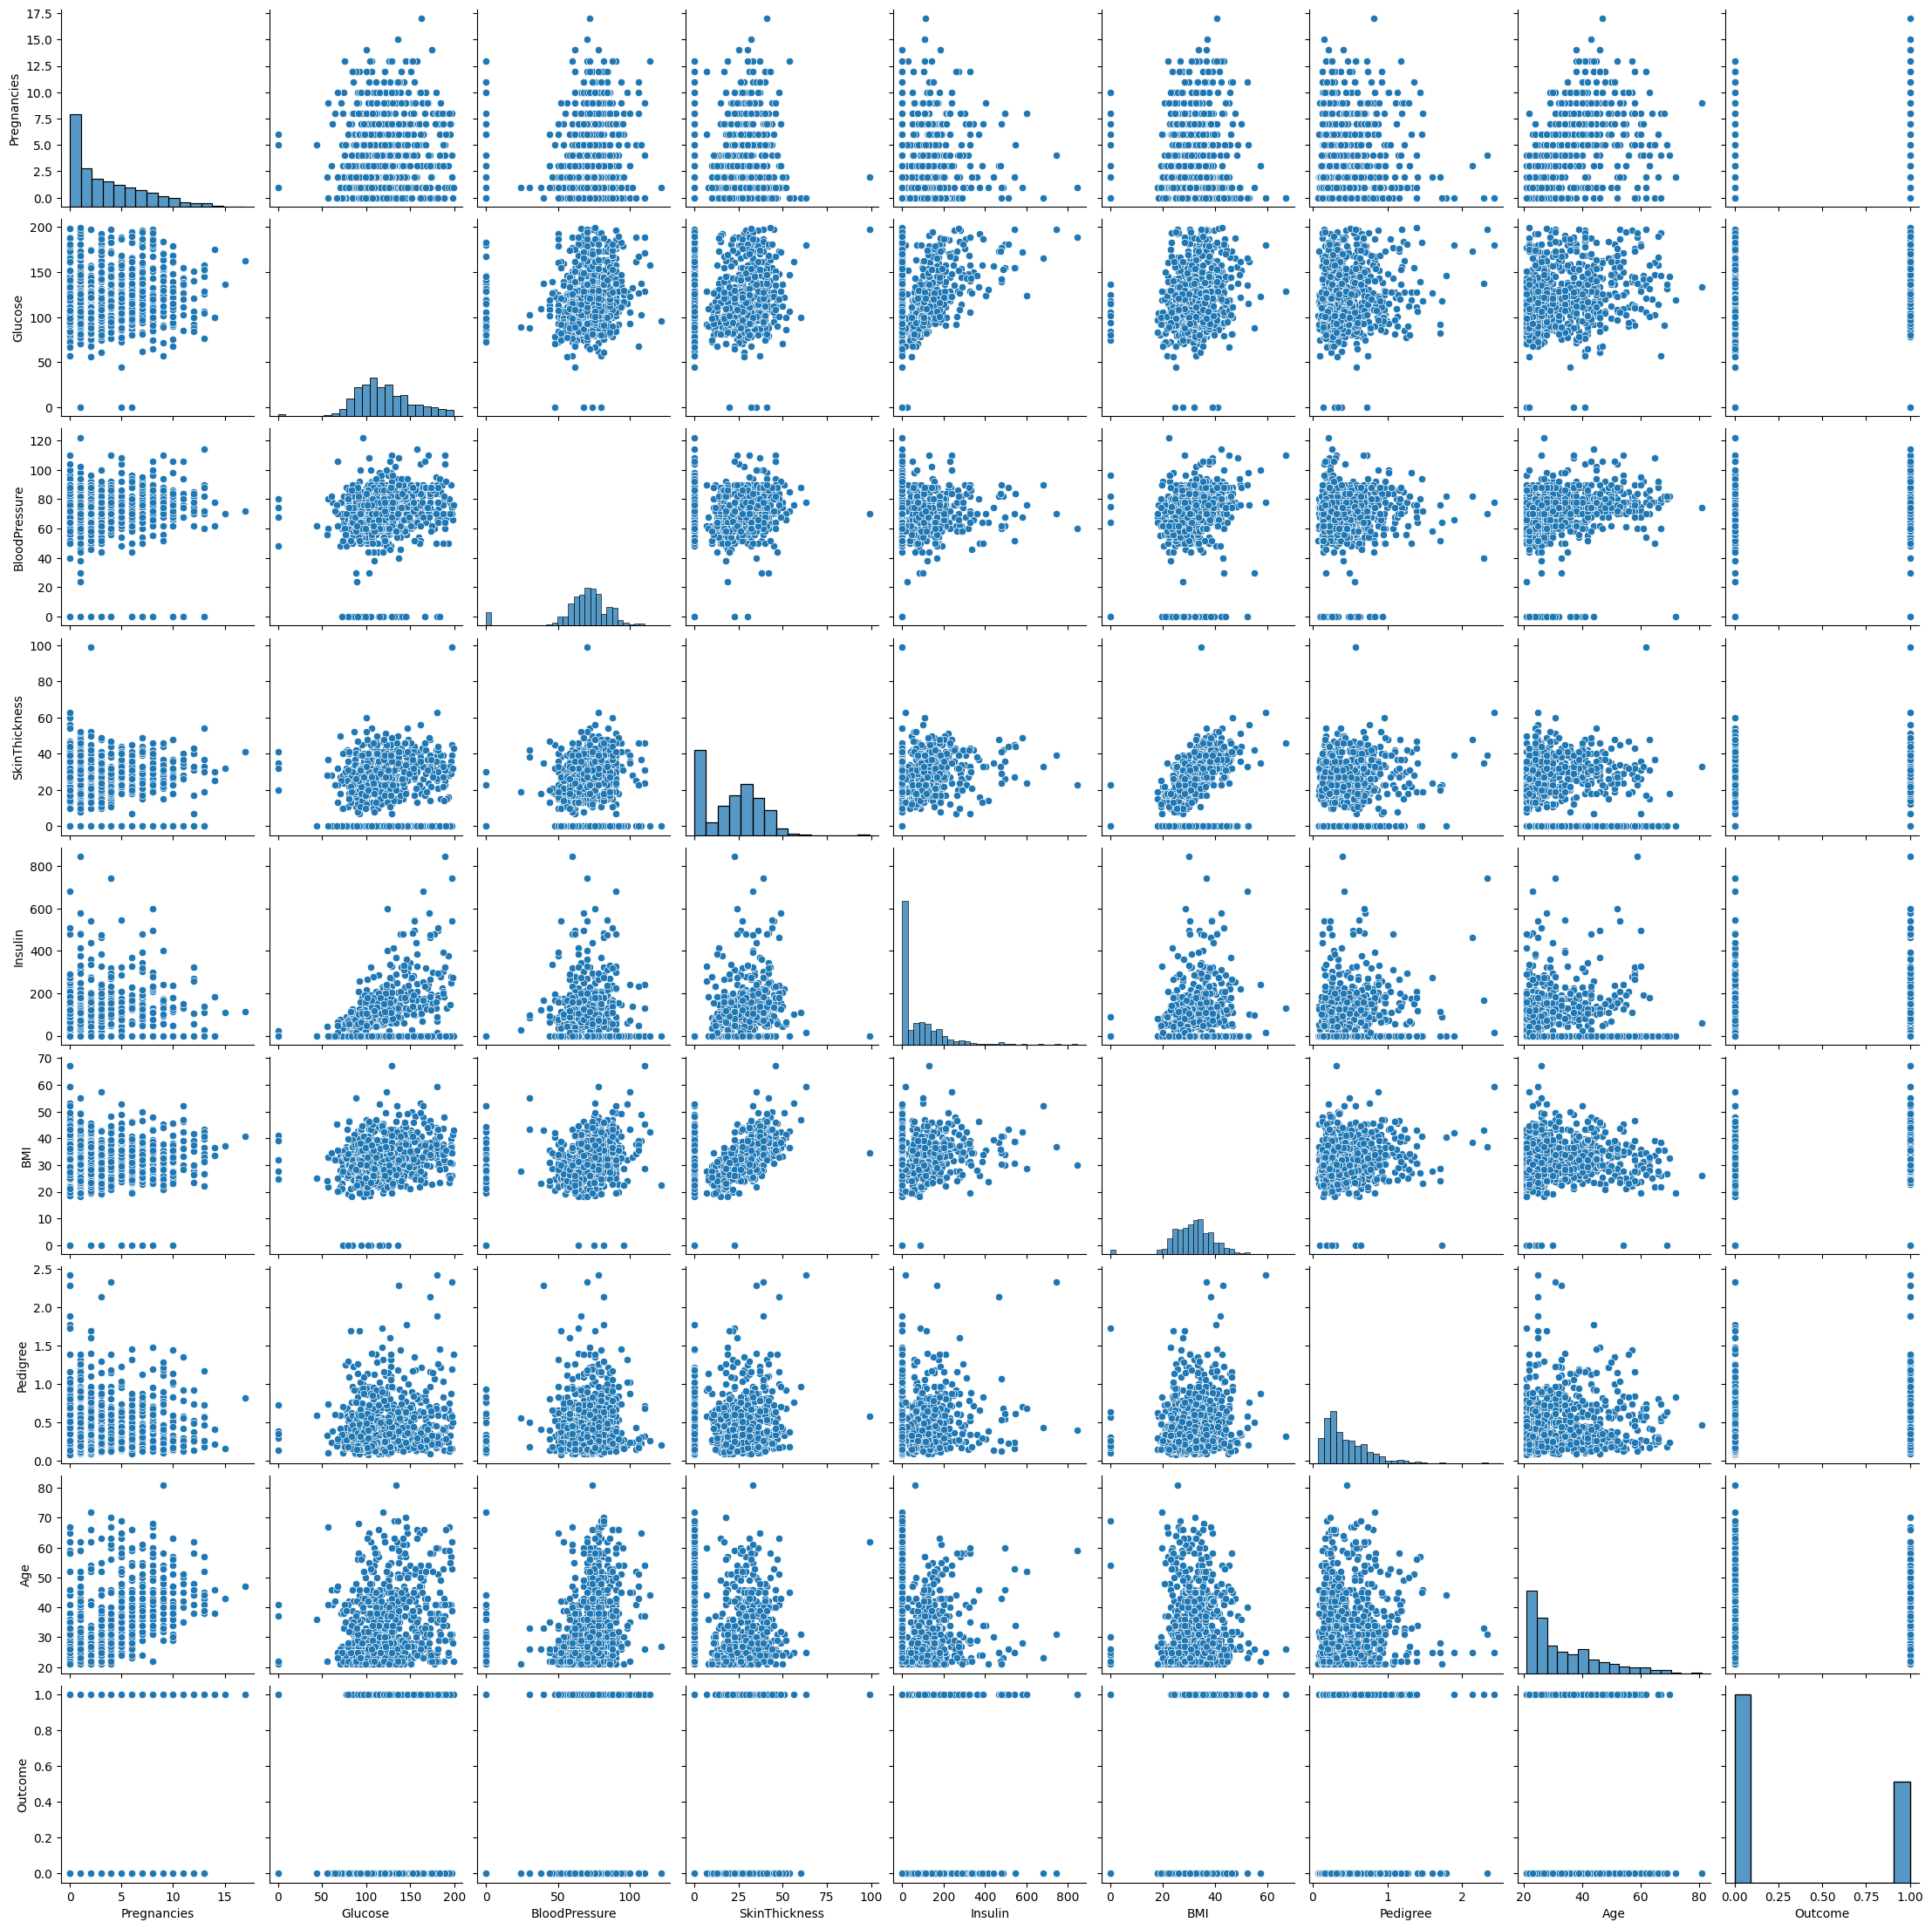

In [28]:
sns.pairplot(df)

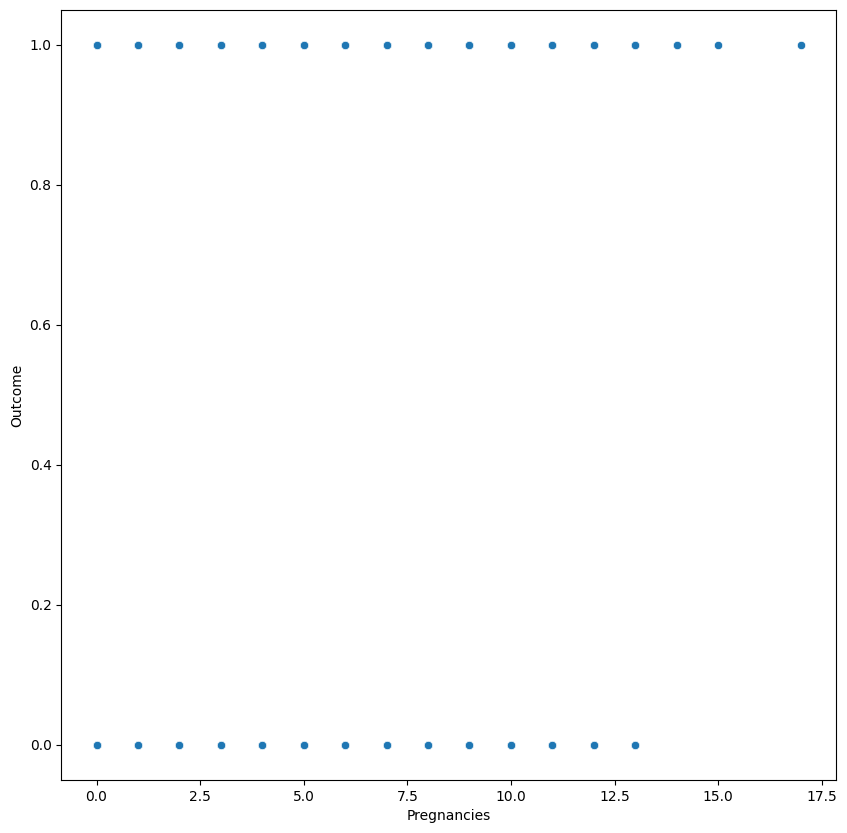

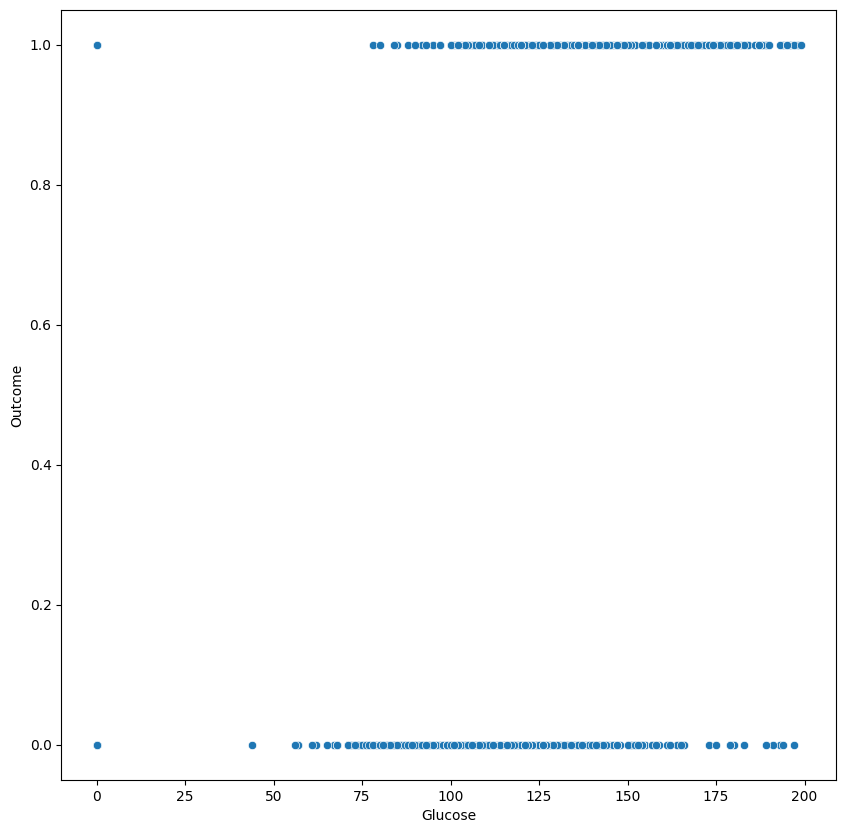

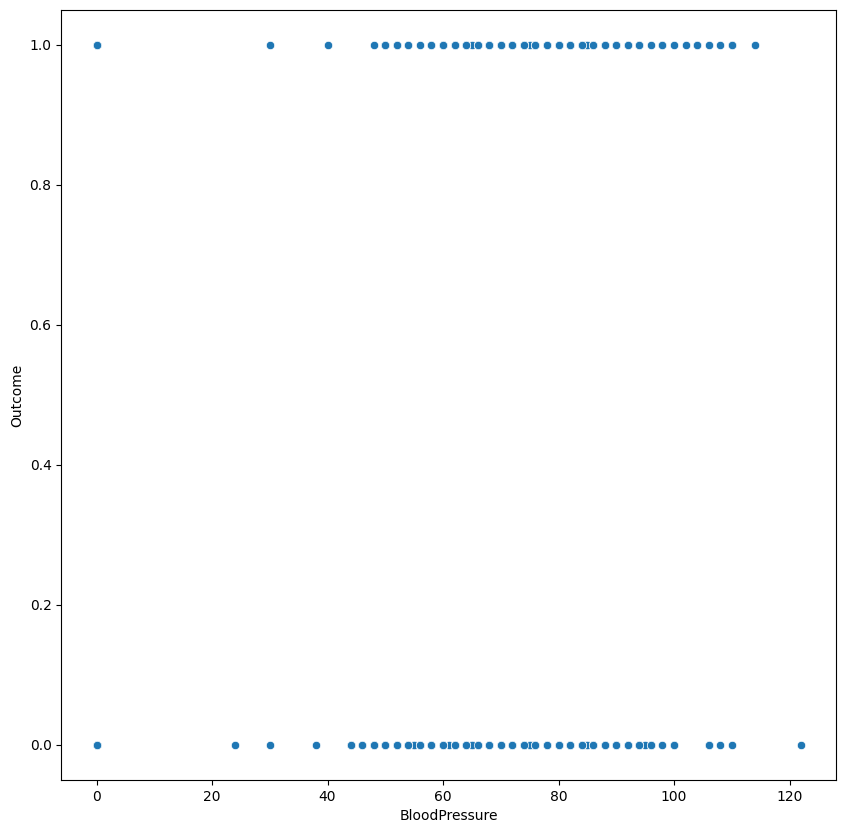

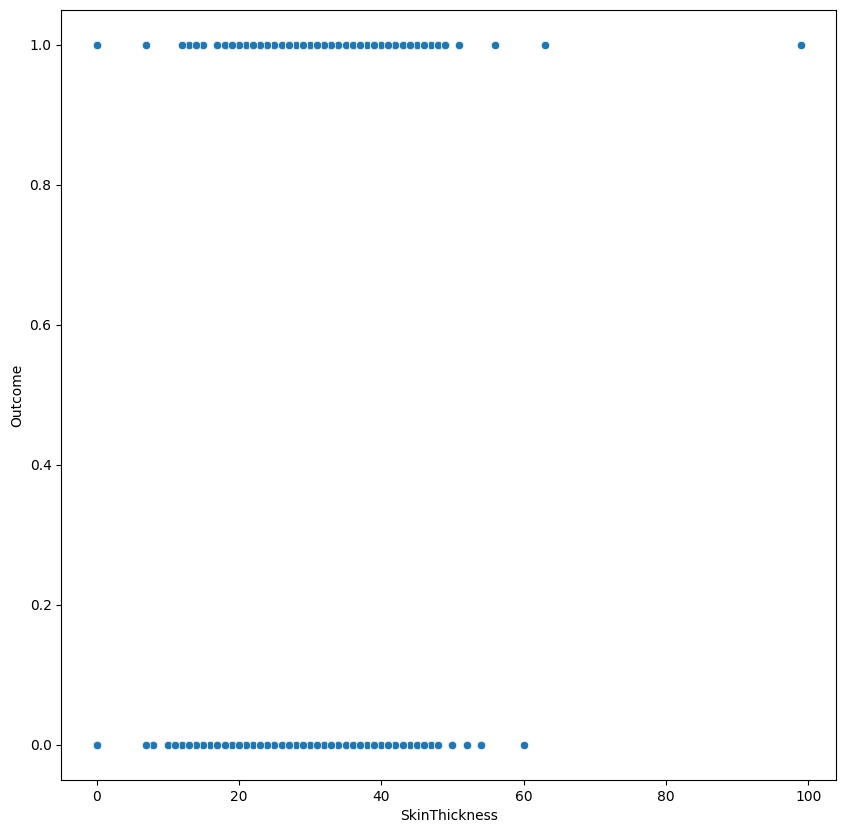

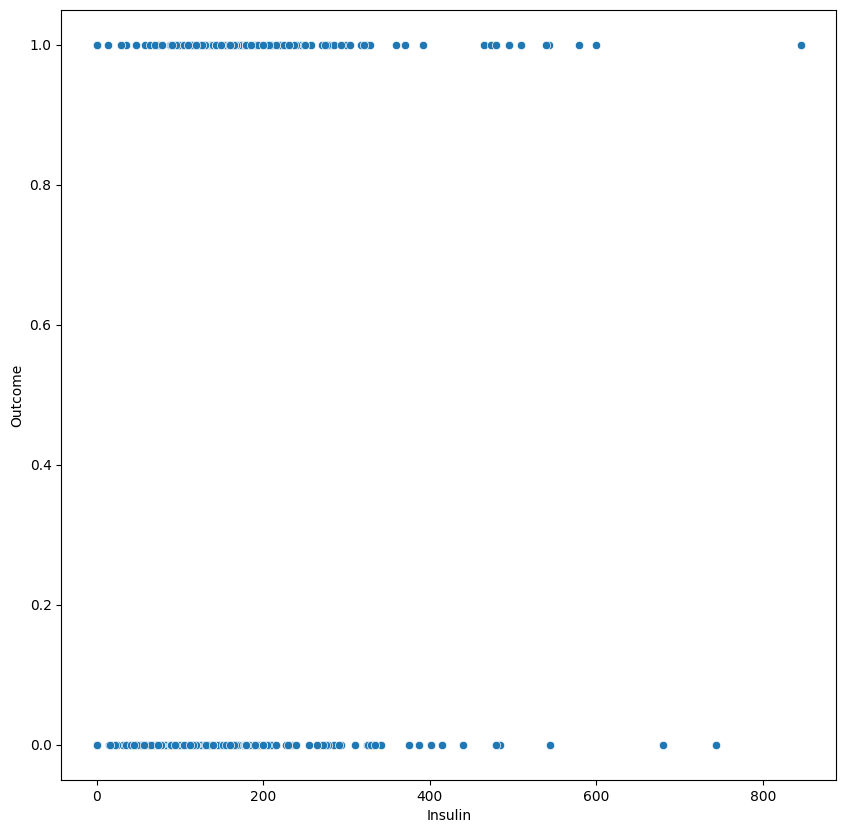

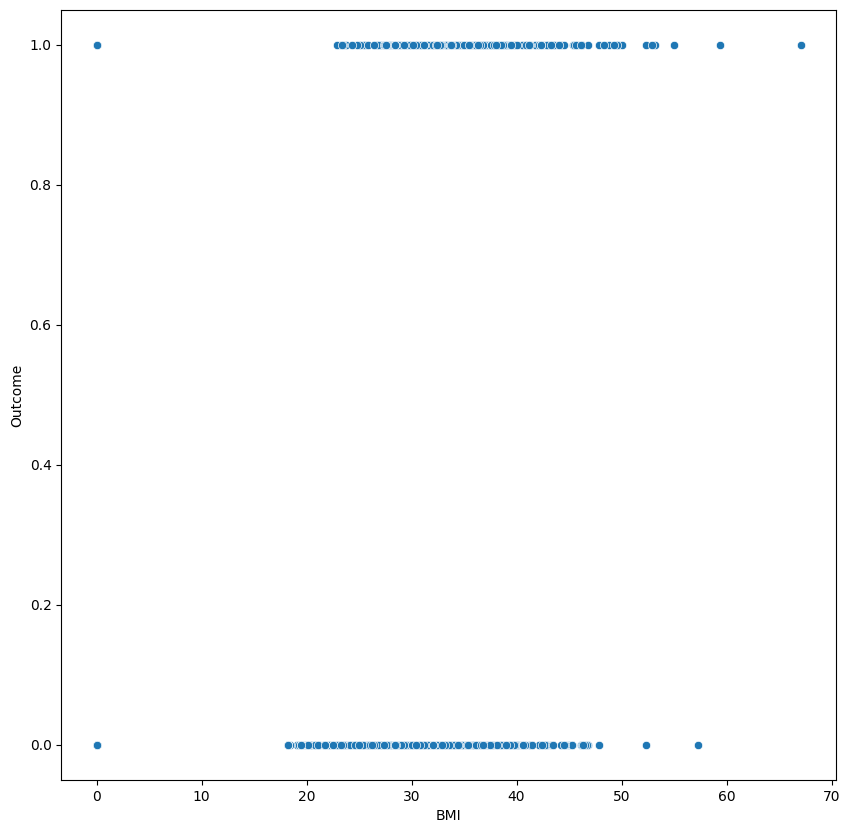

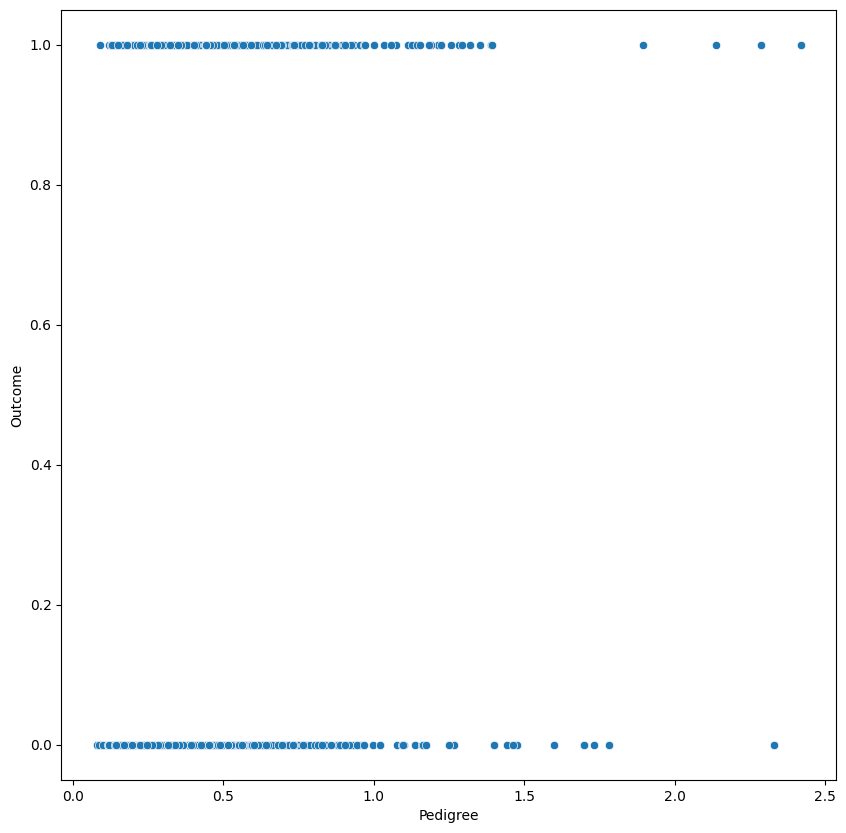

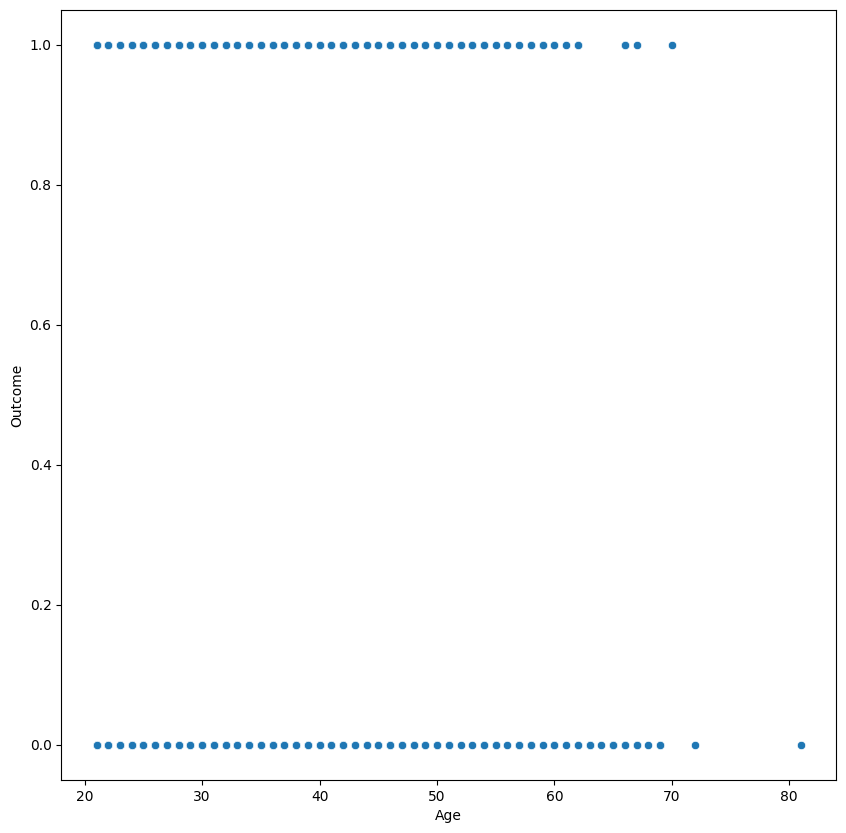

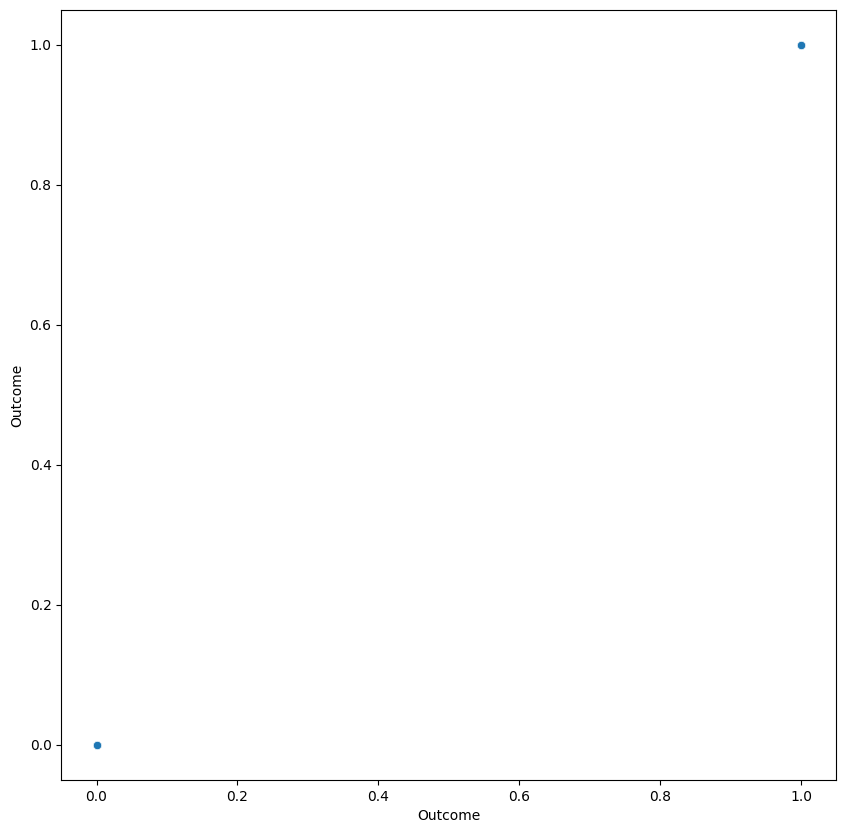

In [29]:
for i in df:
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=df[i],y=df['Outcome'],data=df)

In [30]:
df.shape

(768, 9)

In [31]:
y=df['Outcome']
x=df.drop(columns=['Outcome'],axis=1)


In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [35]:
x_train.shape

(614, 8)

In [36]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
x_test

array([[-0.24089406,  1.64043814,  0.66665568, ...,  0.81654887,
         5.1530438 , -0.68966517],
       [ 0.3472131 ,  0.73226286,  0.66665568, ...,  0.00987405,
        -0.0474767 ,  2.13507623],
       [-0.24089406,  1.67175453, -0.55536673, ...,  0.12331269,
         0.38770039,  0.25191529],
       ...,
       [ 0.3472131 , -0.17591242,  1.48133729, ...,  2.64417151,
        -0.79746274, -0.4328705 ],
       [-1.1230548 , -0.58302548,  0.31023248, ..., -4.02350006,
         0.32288678, -1.03205807],
       [-0.82900122, -0.73960742,  0.05564448, ...,  0.77873599,
        -0.76968548, -0.26167405]], shape=(154, 8))

In [38]:
x_train

array([[ 0.93532026,  0.66963008, -0.45353153, ..., -0.39346336,
         0.67781845,  2.3918709 ],
       [-0.53494764, -0.67697464,  0.05564448, ..., -1.45222407,
        -0.71721732, -0.51846872],
       [-0.82900122, -0.99013853,  0.36115008, ..., -0.0909603 ,
        -0.8499309 , -0.86086162],
       ...,
       [ 1.817481  , -0.17591242, -3.50858756, ...,  0.42581575,
        -1.02893991, -0.34727227],
       [ 0.3472131 , -0.26986159, -0.14802592, ...,  0.7409231 ,
        -0.6369719 ,  0.67990642],
       [-0.82900122,  0.0433023 , -0.24986112, ...,  0.40060716,
         0.69325026, -0.26167405]], shape=(614, 8))

In [39]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred=knn.predict(x_test)
accuracy_score(y_pred,y_test)

0.7142857142857143

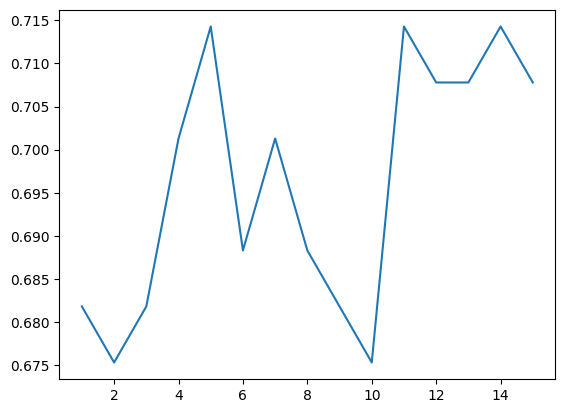

In [41]:
scores=[]
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_pred,y_test))

plt.plot(range(1,16),scores)